# Playing Around with Rebound: The Solar System

(Partially copied from Dhvani)

In [176]:
import rebound
import numpy as np
import matplotlib.pylab as plt

from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import cm

# Initialize the Simulation and Set Units

## Initialize the "bodies"

In [177]:
# Create a simulation
sim = rebound.Simulation()

# Set up units
sim.units = ('AU', 's', 'Msun')

# ----------------------------------------------------------------------------

# Add the Sun
sim.add(m=1.0)

# Add the major planets with their approximate masses, semi-major axes, and eccentricities
# Masses are in solar masses, semi-major axes are in AU, and eccentricities are dimensionless

# Mercury
sim.add(m=1.65e-7, a=0.39, e=0.205,hash="mercury")

# Venus
sim.add(m=2.45e-6, a=0.72, e=0.007,hash="venus")

# Earth
sim.add(m=3.00e-6, a=1.00, e=0.017,hash="earth")

# Mars
sim.add(m=3.22e-7, a=1.52, e=0.093,hash="mars")

# Jupiter
sim.add(m=9.54e-4, a=5.20, e=0.049,hash="jupiter")

# Saturn
sim.add(m=2.86e-4, a=9.58, e=0.056,hash="saturn")

# Uranus
sim.add(m=4.37e-5, a=19.22, e=0.046,hash="uranus")

# Neptune
sim.add(m=5.15e-5, a=30.05, e=0.010,hash="neptune")

print('There are {} bodies in the system'.format(sim.N))

colors = ['yellow', 'orange', 'pink', 'green', 'red', 'gold', 'brown' , 'blue', 'white']
names = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn' , 'Uranus', 'Neptune']

There are 9 bodies in the system


In [178]:
# sim.softening = 1e4

# Evolve the System

In [179]:
# Set the number of timesteps ( 10 year in seconds)
year = 60*60*24*360

t_total = 1*year
dt = 1e2
num_timesteps = int(t_total/dt)
sim.dt=dt

# Create arrays to store positions
positions_x = np.zeros((num_timesteps, sim.N))
positions_y = np.zeros((num_timesteps, sim.N))

# Integrate the simulation for each timestep
for i in range(num_timesteps):
    
    # Record positions
    positions_x[i, :] = [p.x for p in sim.particles]
    positions_y[i, :] = [p.y for p in sim.particles]

    # Integrate for one timestep
    sim.integrate(sim.t + sim.dt)

In [180]:
num_timesteps

311040

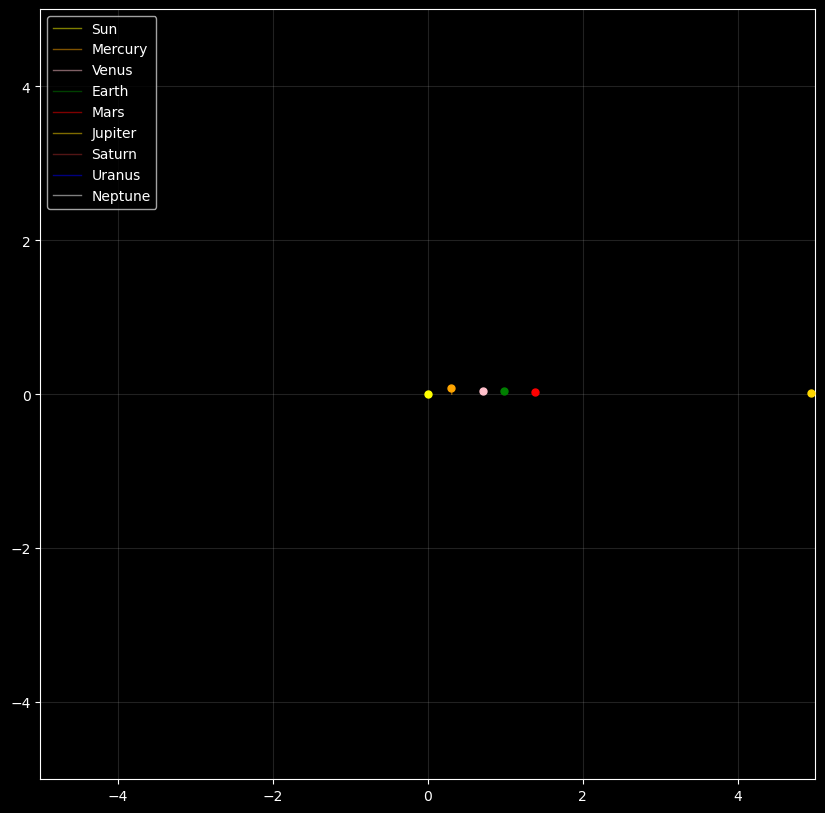

In [181]:
plt.figure(figsize=(10,10))

plotOrbitsandBodies(positions_x, positions_y, ti=2000)

In [182]:
def plotBodies(positions_x, positions_y, ti):
#     plt.style.use("dark_background")
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    ps = []
    for i in range(9):
        p = plt.scatter(positions_x[:,i][ti],positions_y[:,i][ti], s=25, color=colors[i], zorder=5)
        ps.append(p)
        
        
    return ps

def plotOrbitsandBodies(positions_x, positions_y, ti):
    
    # Plot orbits up to ti and positions at ti
    ps = plotBodies(positions_x, positions_y, ti)

    for i in range(9):
        # Makes it sooo much faster if you plot every 100 values 
        plt.plot(positions_x[:,i][0:ti:100],positions_y[:,i][0:ti:100],label=names[i], linewidth=1, color=colors[i], alpha=0.5)

    plt.legend(loc='upper left')

    plt.grid(alpha=0.2, color='darkgrey')

    
    

# --------------------------------------------------------
# Make some functions for the animation 
def init(): #init for initial frame of the animation

    plotBodies(positions_x, positions_y, ti=0)
    return fig,

def animate(i): # changes frame to frame in the animation
    #animate is a function of i which  is the frame number 

    ax.clear()
    plt.style.use("dark_background")
    plt.title(i)
    plotOrbitsandBodies(positions_x, positions_y, ti=i*500)

    return fig,

In [183]:
# -------------------------------------------------------- Animate
# Commented out since this takes hours to run
# Please see my git repository for the gif

fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
plt.style.use("dark_background")
ani = animation.FuncAnimation(fig, animate, init_func=init,frames=int(num_timesteps / 500))
ani.save('test3.gif',writer='pillow',fps=500)
plt.close()